<a href="https://colab.research.google.com/github/KAVINRAJ06/Credit_Card_Transactions_Fraud_Detection/blob/main/Credit_Card_Transactions_Fraud_Detection_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Importing Required Libraries

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


Loading Datasets

In [7]:
train_df = pd.read_csv('/content/fraudTrain.csv')
test_df = pd.read_csv('/content/fraudTest.csv')


Exploreing the Data

In [8]:
print(train_df.head())
print("Training feature columns:", train_df.columns.tolist())



   Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2019-01-01 00:00:18  2703186189652095   
1           1   2019-01-01 00:00:44      630423337322   
2           2   2019-01-01 00:00:51    38859492057661   
3           3   2019-01-01 00:01:16  3534093764340240   
4           4   2019-01-01 00:03:06   375534208663984   

                             merchant       category     amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                fraud_Lind-Buckridge  entertainment  220.11     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4                 fraud_Keeling-Crist       misc_pos   41.96      Tyler   

      last gender                        street  ...      lat      long  \
0    Banks      F                561 Perry Cove  ...  36.0788  -81.1781   
1     Gill      F  43039 Riley Greens Suite 393  ...  48

Preprocessing the Data

In [9]:
train_df['trans_date_trans_time'] = pd.to_datetime(train_df['trans_date_trans_time'])
test_df['trans_date_trans_time'] = pd.to_datetime(test_df['trans_date_trans_time'])
train_df['trans_time'] = train_df['trans_date_trans_time'].dt.hour * 60 + train_df['trans_date_trans_time'].dt.minute
test_df['trans_time'] = test_df['trans_date_trans_time'].dt.hour * 60 + test_df['trans_date_trans_time'].dt.minute
train_df.drop('trans_date_trans_time', axis=1, inplace=True)
test_df.drop('trans_date_trans_time', axis=1, inplace=True)



Separateing Features and Target Variable

In [10]:
X_train = train_df.drop('is_fraud', axis=1)
y_train = train_df['is_fraud']
X_test = test_df.drop('is_fraud', axis=1)
y_test = test_df['is_fraud']


Defineing Categorical and Numeric Columns

In [11]:
categorical_cols = ['merchant', 'category', 'first', 'last', 'gender', 'street', 'city', 'state', 'job']
numeric_cols = X_train.select_dtypes(include=['float64', 'int64']).columns.tolist()


Create Preprocessor and Pipeline

In [12]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])


Training the Model

In [13]:
pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Unnamed: 0', 'cc_num',
                                                   'amt', 'zip', 'lat', 'long',
                                                   'city_pop', 'unix_time',
                                                   'merch_lat', 'merch_long']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['merchant', 'category',
                                                   'first', 'last', 'gender',
                                                   'street', 'city', 'state',
                                                   'job'])])),
                ('classifier',
                 LogisticRegression(max_iter=1000, random_state=42))])

Make Predictions and Calculate Accuracy

In [14]:
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 99.59%


Ploting Correlation Heatmap

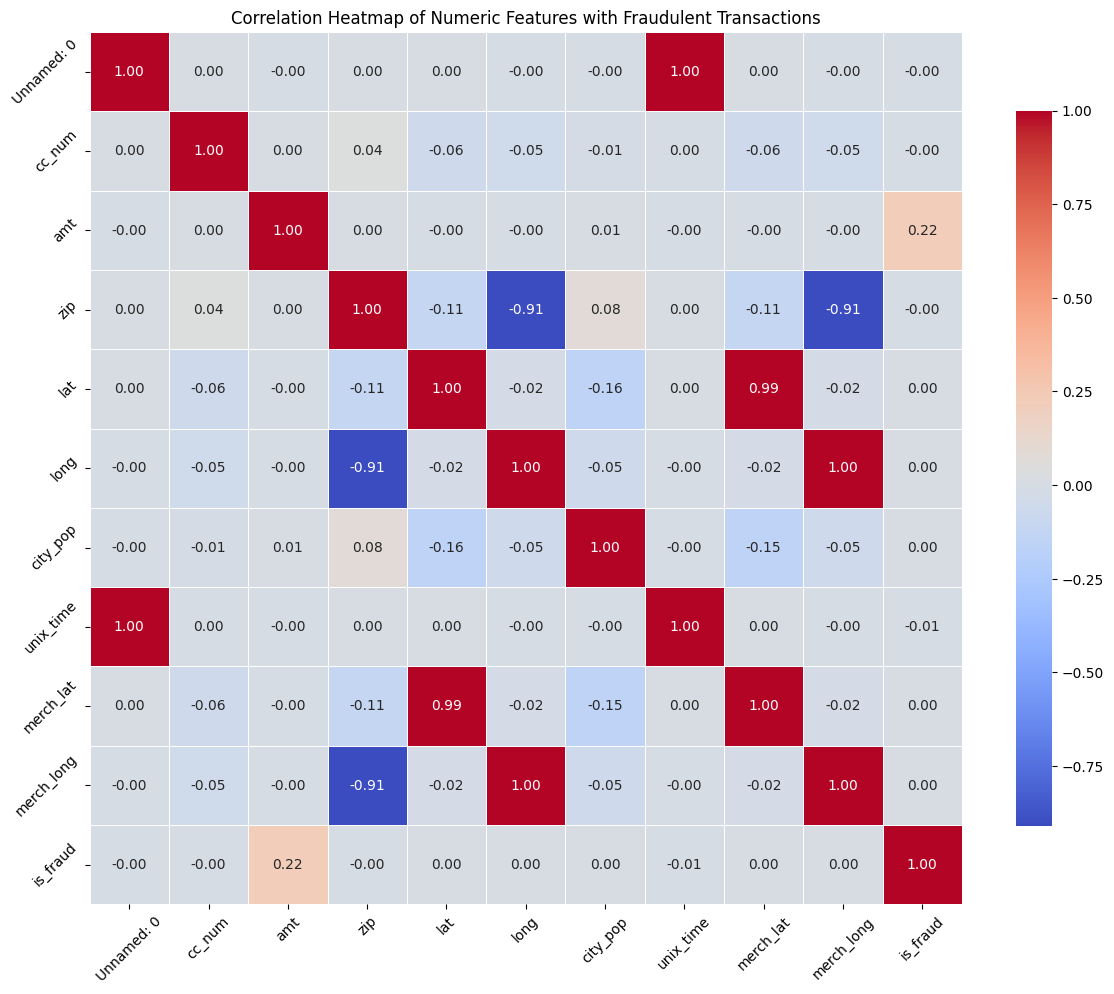

In [15]:
numeric_columns = train_df.select_dtypes(include=['float64', 'int64']).columns.tolist()
correlation_matrix = train_df[numeric_columns].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True,
            linewidths=.5, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap of Numeric Features with Fraudulent Transactions')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()

